<a href="https://colab.research.google.com/github/lourencocavalcante/Introduction-to-Data-Science/blob/main/CAP394_2022_ProjetoFinal_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# <span style="color:#336699">Uma análise exploratória de dados meteorologicos: investigando valores não realísticos e a correlação de atributos do disdrômetro RD80 e do radiômetro de microondas MP3000A</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 110%;">
    <b>CAP-394 – Introdução à Ciência de Dados</b>
    <br/>
    <b>Docentes:</b> Dr. Rafael Duarte Coelho dos Santos e Dr. Gilberto Ribeiro de Queiroz
    <br/><br/>
    <b>Discente:</b> Lourenço José Cavalcante Neto
    <br/>
    <b>E-mail:</b> <a href="mailto:lourenco.cavalcante@ifto.edu.b">lourenco.cavalcante@ifto.edu.br</a>

</div>

<br/>

<div style="text-align: justify;  margin-left: 20%; margin-right: 20%;">
<b>Motivação: </b> O presente projeto compõe o trabalho final da disciplina <i>CAP-394 - Introdução à Data Scienc</i>, do curso de Mestrado em Computação Aplicada do Instituto Nacional de Pesquisas Espaciais (INPE), ministrada pelos professores Dr. Rafael Duarte Coelho dos Santos e Dr. Gilberto Ribeiro de Queiroz. O principal objetivo é analizar dados meteorológicos oriundos de dois equipamentos ( Radiômetro de Microondas MP3000A e o Disdrômetro RD80) instalados nas proximidades da torre ATTO, em sítio chamado Campina, na região amazônica, para tentar responder as seguintes perguntas:
<br/><br/>
1. Através da análise de atributos, é possível identificar valores não realísticos? É possível serem identificadas correlações entre os dados do MP3000A e do RD80?
<br/>
2. Quais os períodos do dia em que as chuvas apresentaram maior intensidade (mm/h)?
<br/>
3. Através da análise é possível classificar a intensidade das chuvas?
<br/>
4. É possível serem identificadas correlações entre os atributos de Temperatura do Ambiente (°C), Temperatura no canal Infravermelho (°C), Umidade Relativa e a Intensidade da chuva (mm/h) ?
<br/>
5. É possível aplicar alguma técnica de Inteligência Artificial que faça a previsão de chuva e sua intensidade para curto prazo?
</div>


Este notebook também pode ser visualizado no meu diretório de materiais e atividades da disciplina **CAP-394** no **Github**,  [Clicando aqui](https://github.com/lourencocavalcante/Introduction-to-Data-Science.git).

# **Análise Exploratória de Dados (EDA)**

A análise exploratória dos dados (AED) foi um termo que ganhou bastante popularidade quando Tukey publicou o livro Exploratory Data Analysis em 1977 que tratava uma “busca por conhecimento antes da análise de dados de fato”. Ocorre quando busca-se obter informações ocultas sobre os dados, tais como: variação, anomalias, distribuição, tendências, padrões e relações.

## **Dataset**

Os dados meteorológicos são oriundos de dois equipamentos (**Radiômetro de Microondas "MP3000A"** e o **Disdrômetro "RD80"**), ambos instalados próximo à torre ATTO, em um sítio chamado Campina, na região Amazônica. O MP3000A mede diversas variáveis ambiente, entre elas a radiância no espectro de onda do microonda em diversos canais e estimativas de parâmetros de nuvens. Já o RD80 mede a distribuição das gotas de chuva que chegam à superfície.

Os dados compreendem o período de 17 de março de 2020 a 07 julho 2022.

## **Importação de módulos e bibliotecas**
São várias as bibliotecas que podem ser utilizadas para realizar o pré-processamento de dados. Entre elas podemos destacar a biblioteca **Pandas**. Trata-se de uma biblioteca para leitura, manipulação e análise de dados tabulados. Essa biblioteca oferece estruturas de dados e operações para manipular conjuntos massivos de tabelas numéricas e séries temporais de forma otimizada. No python, por convensão, as bibliotecas são importadas conforme podemos ver na célula abaixo:

In [4]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import calendar
import datetime

## **Obtendo os arquivos de dados**

In [2]:
#Vamos baixar os dados do Google Drive para o Notebook

 #Down. WD_campina_report_RZLwcDmDtNdrop_b2.1_report (df_RD80_JOSS_final)
!gdown --id 1pA0E4cUH0GdSD7EH_rARU5DqWOcGrcyW

 #Down. level1_output_sfc, level1_output_bt, level2_output_cld_atto (df_MP3000A_final)
!gdown --id 15YqFCbGZBuQDMO2dNh8hjMhhOJwRicUf

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1pA0E4cUH0GdSD7EH_rARU5DqWOcGrcyW
To: /content/df_RD80_JOSS_final.csv
100% 34.9M/34.9M [00:00<00:00, 75.9MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15YqFCbGZBuQDMO2dNh8hjMhhOJwRicUf
To: /content/df_MP3000A_final.csv
100% 410M/410M [00:02<00:00, 149MB/s]


Temos 02 (dois) arquivos:

* **df_MP3000A_final.csv**: 
`Neste arquivo estão os dados do ambiente próximo à superfície, dados das medidas dos canais do microonda e as variáveis estimadas associadas a parâmetros de nuvens.`

* **df_RD80_JOSS_final.csv**: 
`Neste arquivo estão dados de medida da distribuição das gotas de chuva que chegam à superfície.`

Com o objetivo de facilitar a leitura dos dados e torná-los **tidy**, primeiramente será necessário carregá-los como um **dataframe**. Vamos carregar os dados e criar os dataframes:

In [12]:
#Abrindo os dados e criando os Dataframes
df_RD80_JOSS_final=read_csv('/content/df_RD80_JOSS_final.csv', index_col=[0])


In [15]:
#Vamos visualizar as primeiras 2 e últimas 2 linhas dos dados
df_RD80_JOSS_final.loc[df_RD80_JOSS_final['Rain_Intensity_mm_h'] > 0].head(n=2).append(df_RD80_JOSS_final.loc[df_RD80_JOSS_final['Rain_Intensity_mm_h'] > 0].tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Time_integration_s,Light_Rain,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain
417,2020-03-17 20:49:00,2020-03-17,2020,Mar,Tuesday,20:49:00,23.55615,15159.06445,1.06382,1.86399,60.0,0,0,1,0,0,3,Chuva forte
418,2020-03-17 20:50:00,2020-03-17,2020,Mar,Tuesday,20:50:00,14.56254,6636.11426,0.72363,1.61044,60.0,0,0,1,0,0,3,Chuva forte
314711,2022-06-28 21:21:00,2022-06-28,2022,Jun,Tuesday,21:21:00,0.23103,36.19424,0.01553,1.04613,60.0,1,0,0,0,0,1,Chuva fraca
314712,2022-06-28 21:22:00,2022-06-28,2022,Jun,Tuesday,21:22:00,0.14332,16.72017,0.01099,0.89704,60.0,1,0,0,0,0,1,Chuva fraca


In [ ]:
#Abrindo os dados e criando os Dataframes
df_MP3000A_final=read_csv('/content/df_MP3000A_final.csv', index_col=[0])

In [14]:
#Vamos visualizar as primeiras 2 e últimas 2 linhas dos dados
df_MP3000A_final.loc[df_MP3000A_final['DataQuality'] > 0].head(n=2).append(df_MP3000A_final.loc[df_MP3000A_final['DataQuality'] > 0].tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,DataQuality,Tamb_K,Rh_percent,Pres_mb,...,Ch_54_940,Ch_55_500,Ch_56_020,Ch_56_660,Ch_57_288,Ch_57_964,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km
0,2021-07-27 18:13:14,2021-07-27,2021,Jul,Tuesday,18:13:14,1.0,294.66,59.58,1007.91,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
639828,2021-07-27 18:13:43,2021-07-27,2021,Jul,Tuesday,18:13:43,1.0,0.00,0.00,0.00,...,299.012,299.483,299.548,299.959,299.148,299.191,297.988,0.000,0.0,0.0
1919063,2022-06-01 09:19:59,2022-06-01,2022,Jun,Wednesday,09:19:59,1.0,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.176,0.0,0.0
639827,2022-06-01 09:20:02,2022-06-01,2022,Jun,Wednesday,09:20:02,1.0,296.90,97.12,1006.71,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0


Vamos criar uma lista contendo os Dataframes para que possamos manipulá-los a partir daqui.

In [18]:
list_dataframes = [df_RD80_JOSS_final, df_MP3000A_final]

In [19]:
#Vamos verificar o tamanho dos Datasets e visualizar as suas colunas.
print('TAMANHO DO DATASET E QUANTIDADE DE ATRIBUTOS:\n')
for item in list_dataframes:
  print('Tamanho do dataset: ',item.shape[0], ' - Quantidade de atributos: ', item.shape[1])

TAMANHO DO DATASET E QUANTIDADE DE ATRIBUTOS:

Tamanho do dataset:  315420  - Quantidade de atributos:  18
Tamanho do dataset:  1919064  - Quantidade de atributos:  36


In [22]:
#df_filter_MP3000A_RD80 = df_RD80_JOSS_final.query("(Datetime >= '2020-03-1' and Datetime <='2022-07-30') and (Rain_Intensity_mm_h > 0 and DataQuality > 0)")
df_filter0_MP3000A_final = df_MP3000A_final.query("(DataQuality > 0)")

In [23]:
df_filter0_MP3000A_final

,Datetime,Date,Year,Month,Day_of_week,Time,DataQuality,Tamb_K,Rh_percent,Pres_mb,...,Ch_54_940,Ch_55_500,Ch_56_020,Ch_56_660,Ch_57_288,Ch_57_964,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km
0,2021-07-27 18:13:14,2021-07-27,2021,Jul,Tuesday,18:13:14,1.0,294.66,59.58,1007.91,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0
639828,2021-07-27 18:13:43,2021-07-27,2021,Jul,Tuesday,18:13:43,1.0,0.00,0.00,0.00,...,299.012,299.483,299.548,299.959,299.148,299.191,297.988,0.000,0.00,0.0
1279522,2021-07-27 18:13:45,2021-07-27,2021,Jul,Tuesday,18:13:45,1.0,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.642,19.68,0.0
1,2021-07-27 18:13:47,2021-07-27,2021,Jul,Tuesday,18:13:47,1.0,294.61,59.31,1008.01,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0
639829,2021-07-27 18:14:16,2021-07-27,2021,Jul,Tuesday,18:14:16,1.0,0.00,0.00,0.00,...,300.292,300.012,299.761,299.947,300.099,300.532,299.782,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919062,2022-06-01 09:19:26,2022-06-01,2022,Jun,Wednesday,09:19:26,1.0,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.400,0.00,0.0
639826,2022-06-01 09:19:28,2022-06-01,2022,Jun,Wednesday,09:19:28,1.0,296.90,97.12,1006.81,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0
1279521,2022-06-01 09:19:57,2022-06-01,2022,Jun,Wednesday,09:19:57,1.0,0.00,0.00,0.00,...,288.287,290.856,292.084,292.356,293.001,293.633,292.026,0.000,0.00,0.0
1919063,2022-06-01 09:19:59,2022-06-01,2022,Jun,Wednesday,09:19:59,1.0,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.176,0.00,0.0


In [ ]:
'''def convert_k_c(info):
  temperatura = (info-273)
  return temperatura'''

#df_filter_MP3000A_RD80['Tamb_K'][df_MP3000A_RD80_final['Rain_Intensity_mm_h'] != 0] = (df_filter_MP3000A_RD80['Tamb_K']/100.)-273.15


'def convert_k_c(info):\n  temperatura = (info-273)\n  return temperatura'

Vamos visualizar o acumulado da intensidade da chuva para todo o período dos dados, olhando apenas os registros de chuva, usando como referência a variável Rain_Intensity_mm_h.

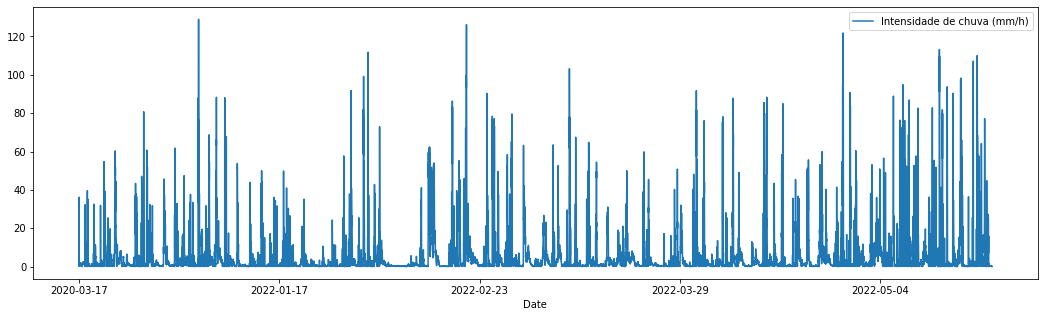

In [26]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_RD80_JOSS_final = df_RD80_JOSS_final.query("(Rain_Intensity_mm_h > 0)")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [18,5]
df_RD80_JOSS_final.plot(kind="line",x="Date",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax)
#df_RD80_JOSS_final.plot(kind='line',x='Date',y="Int_Liquid_mm", label='Conteúdo de água líquida integrado na nuvem (mm)', ax=ax)

Vamos visualizar o acumulado da intensidade da chuva somente para o ano de **2022**.

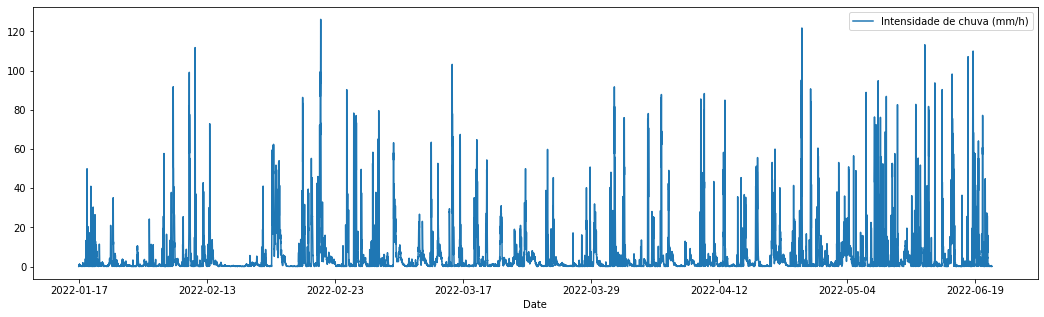

In [27]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_RD80_JOSS_final = df_RD80_JOSS_final.query("(Datetime >= '2022-01-1')")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [15,6]
df_RD80_JOSS_final.plot(kind="line",x="Date",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax)

Também podemos visualizar a série temporal da intensidade das chuvas (mm/h) por diferentes sessões em um dia. Para tanto, precisamos dividir a coluna hora do dia em diferentes sessões de 6h cada. 

In [ ]:
#Vamos converter o "Datetime" em um objeto datetime para que seja mais fácil realizar outras manipulações
df_RD80_JOSS_final['Datetime'] = df_RD80_JOSS_final.Datetime.astype('datetime64')

#Dividindo a coluna hora do dia em diferentes sessões em um dia
df_RD80_JOSS_final=df_RD80_JOSS_final.assign(session=pd.cut(df_RD80_JOSS_final.Datetime.dt.hour,
                              [0,6,12,18,23],
                              labels=['Night','Morning','Afternoon','Evening'],
                              include_lowest=True))

Agora vamos plotar a série temporal da intensidade das chuvas, separando os dados por períodos do dia: Night, Morning, Afternoon e Evening (Noite, Manhã, Tarde e Começo da noite).

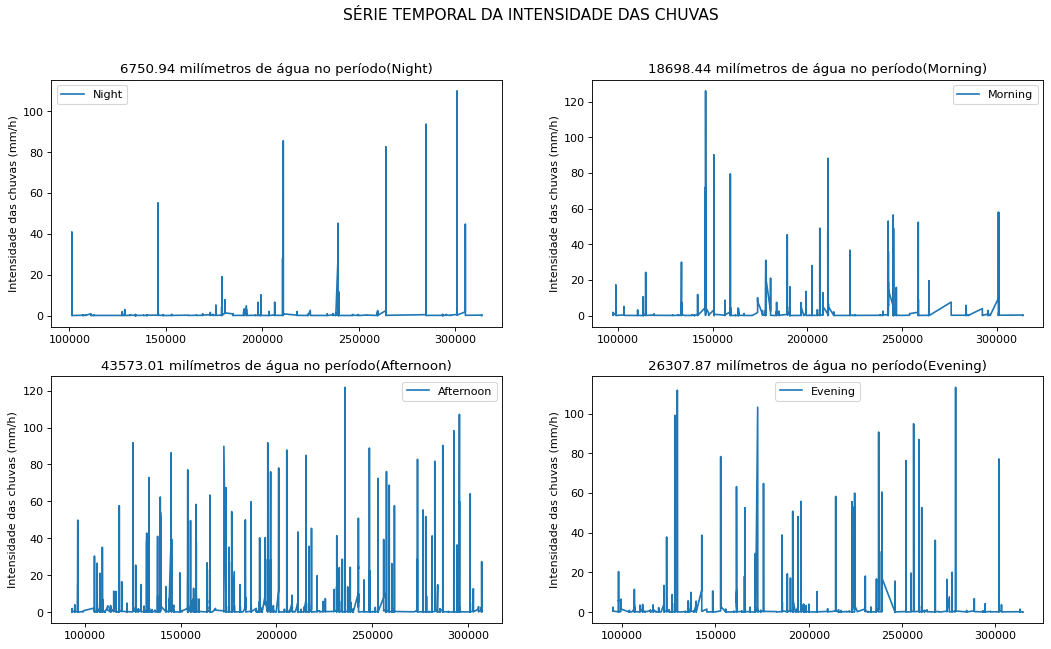

In [31]:
labels=['Night','Morning','Afternoon','Evening']

figure(figsize=(16,9),dpi=80)
plt.suptitle('SÉRIE TEMPORAL DA INTENSIDADE DAS CHUVAS', size=14)
for res in range(0,4):
    tot = round(df_RD80_JOSS_final.Rain_Intensity_mm_h.loc[df_RD80_JOSS_final.session == labels[res]].sum(),2)
    plt.subplot(2,2,res+1)
    plt.title(str(tot)+' milímetros de água no período('+labels[res]+')')
    #plt.xlabel("")
    plt.ylabel("Intensidade das chuvas (mm/h)")
    plt.plot(df_RD80_JOSS_final.loc[df_RD80_JOSS_final.session == labels[res]]['Rain_Intensity_mm_h'], label=labels[res])
    plt.legend()
plt.show()

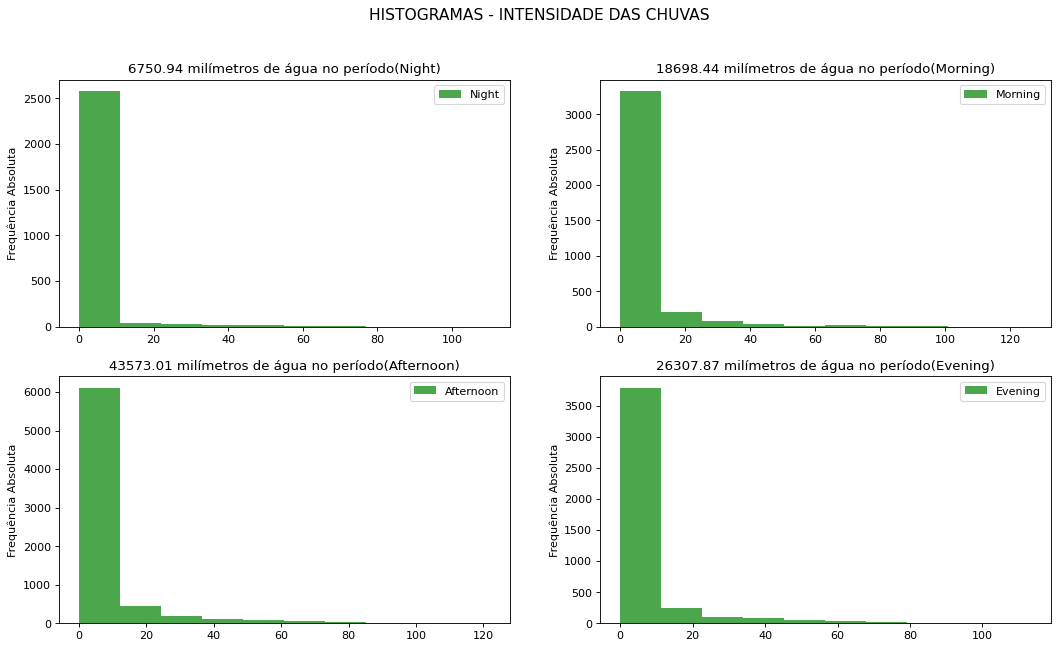

In [32]:
labels=['Night','Morning','Afternoon','Evening']

figure(figsize=(16,9),dpi=80)
plt.suptitle('HISTOGRAMAS - INTENSIDADE DAS CHUVAS', size=14)
for res in range(0,4):
    tot = round(df_RD80_JOSS_final.Rain_Intensity_mm_h.loc[df_RD80_JOSS_final.session == labels[res]].sum(),2)
    plt.subplot(2,2,res+1)
    plt.title(str(tot)+' milímetros de água no período('+labels[res]+')')
    #plt.xlabel("")
    plt.ylabel("Frequência Absoluta")
    plt.hist(df_RD80_JOSS_final.loc[df_RD80_JOSS_final.session == labels[res]]['Rain_Intensity_mm_h'], label=labels[res], color='g', alpha=0.7 )
    plt.legend()
plt.show()

Como podemos ver, os resultados dos gráficos acima nos levam a inferir que ocorreu uma maior intensidade de chuva no período da **tarde (Afternoon)** durante todo o período observado, chegando a uma Frequência Absoluta de mais de 800.

Agora vamos visualizar este dado de forma separada, executando o código da célula abaixo.

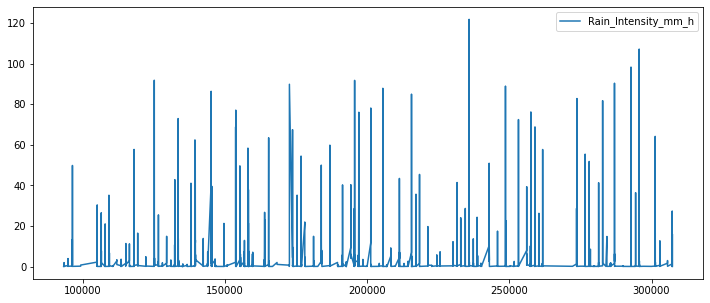

In [33]:
#Plotando o acumulado da intensidade da chuva do período da tarde (Afternoon)

plt.figure(figsize=(12, 5))
df_RD80_JOSS_final.loc[df_RD80_JOSS_final.session == 'Afternoon']['Rain_Intensity_mm_h'].plot(legend=True)

**Vamos visualizar as correlações entre os atributos do MP3000A**

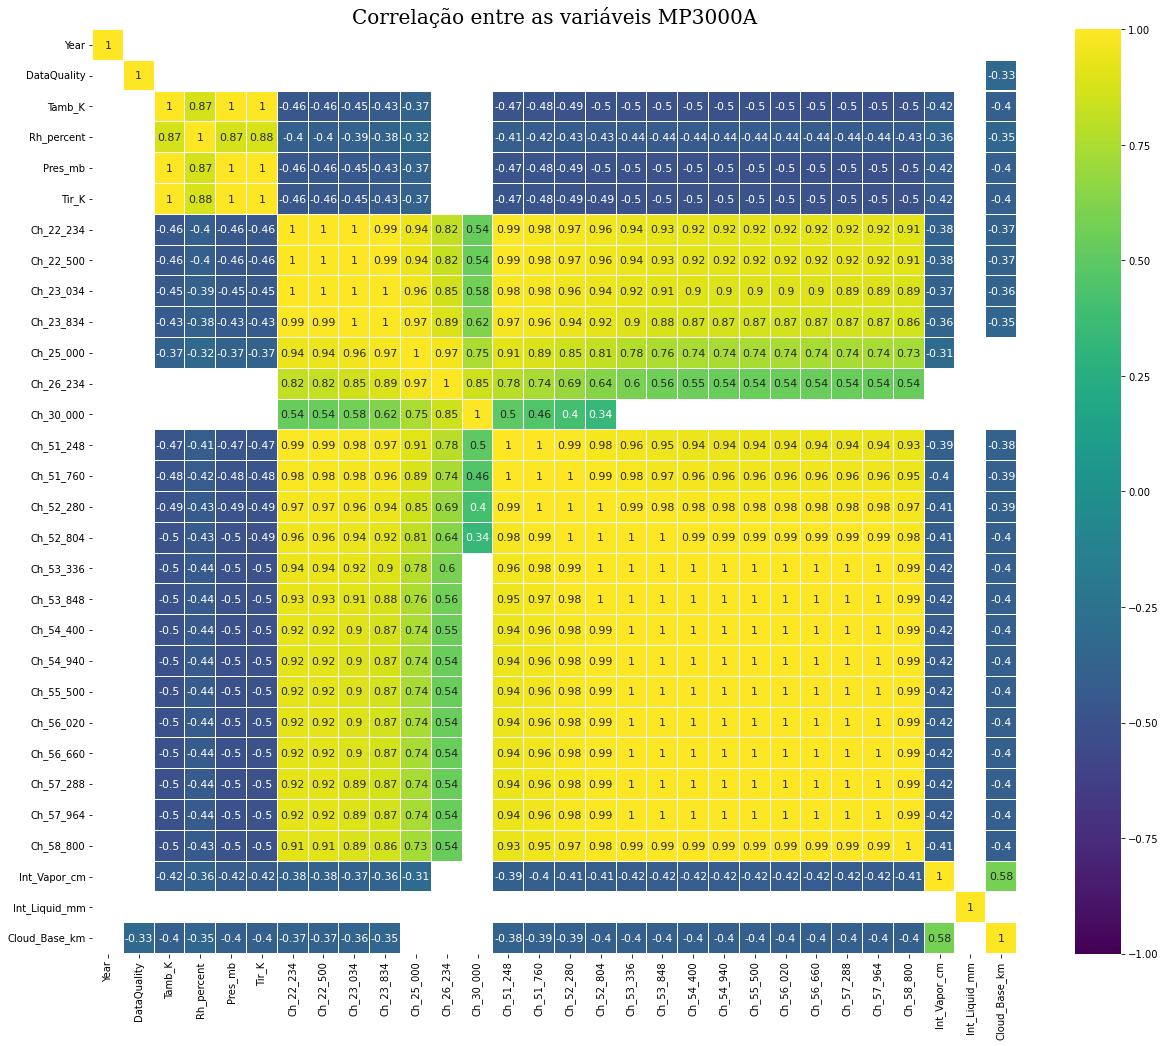

In [45]:
corr = df_MP3000A_final.corr()
plt.figure(figsize=(21, 17))
plt.title('Correlação entre as variáveis MP3000A', fontsize=20, fontfamily='serif')
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 11}, square=True);

# **Considerações**

Como vimos, o período do dia em que apresentou a maior intensidade de chuva (acúmulo total no período observado) foi no horário da tarde (Afternoon).

# **Referências**

BRUCE, A.; BRUCE, P. Estatística Prática para Cientistas de Dados. [S.l.]: Alta Books, 2019. ISBN 9788550810805.

COX, V. Exploratory Data Analysis. In: Translating Statistics to Make Decisions. [S.l.]: Apress, Berkeley, CA, 2017. ISBN 978-1-4842-2256-0.

ESCOVEDO, T.; KOSHIYAMA, A. Introdução a Data Science: Algoritmos de Machine
Learning e métodos de análise. [S.l.]: Casa do Código, 2020. ISBN 9788572540551.

IGUAL, L. et al. Introduction to Data Science: A Python Approach to Concepts, Techniques and Applications. [S.l.]: Springer International Publishing, 2017. (Undergraduate Topics in Computer Science). ISBN 9783319500171.

ROSE, T.; CREWELL, S.; LÖHNERT, U.; SIMMER, C. A network suitable microwave radiometer for operational monitoring of the cloudy atmosphere, Atmos. Res., 75, 183–200, 2005.

Tukey, John (1977). Exploratory Data Analysis. Addison-Wesley Publishing Company.

https://cienciadedadosuff.github.io/cursos/notebooks/caderno-3.html

https://gomesfellipe.github.io/post/2018-05-26-smarteademachinelearning/smarteademachinelearning/